In [39]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [40]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [41]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [42]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [43]:



df = getQuotes(frameM30, 2023, 10)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0
...,...,...,...,...,...,...,...,...
224,1696608000,1.04958,1.05223,1.04879,1.05103,11432,9,0
225,1696609800,1.05104,1.05173,1.05008,1.05114,10991,9,0
226,1696611600,1.05115,1.05342,1.05048,1.05331,9527,9,0
227,1696613400,1.05332,1.05551,1.05331,1.05374,9526,9,0


In [44]:

bullish = 1
bearish = -1
ranging = 0

def fibonacciRange(df):
    df['regime'] = ranging
    bullish_condition = (
        (df['high'] > df['low'].shift(2)) &
        (df['high'] > df['low'].shift(3)) &
        (df['high'] > df['low'].shift(5)) &
        (df['high'] > df['low'].shift(8)) &
        (df['high'] > df['low'].shift(13))
    )
    bearish_condition = (
        (df['low'] < df['high'].shift(2)) &
        (df['low'] < df['high'].shift(3)) &
        (df['low'] < df['high'].shift(5)) &
        (df['low'] < df['high'].shift(8)) &
        (df['low'] < df['high'].shift(13))
    )
    df.loc[bullish_condition, 'regime'] = bullish
    df.loc[bearish_condition, 'regime'] = bearish
    return df



In [45]:


df = fibonacciRange(df)

df


,time,open,high,low,close,tick_volume,spread,real_volume,regime
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0,0
...,...,...,...,...,...,...,...,...,...
224,1696608000,1.04958,1.05223,1.04879,1.05103,11432,9,0,-1
225,1696609800,1.05104,1.05173,1.05008,1.05114,10991,9,0,-1
226,1696611600,1.05115,1.05342,1.05048,1.05331,9527,9,0,-1
227,1696613400,1.05332,1.05551,1.05331,1.05374,9526,9,0,1


In [46]:




def ohlcPlot(df):
    plt.figure(figsize=(14, 6))
    for i in range(len(df)):
        if df.iloc[i]['regime'] == bullish:
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='green',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['open'],ymax=df.iloc[i]['close'],color='green',linewidth=1)
        elif df.iloc[i]['regime'] == bearish:
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='red',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['open'],ymax=df.iloc[i]['close'],color='red',linewidth=1)
        elif df.iloc[i]['regime'] == ranging:
            plt.vlines(x=i,ymin=df.iloc[i]['low'],ymax=df.iloc[i]['high'],color='black',linewidth=1)
            plt.vlines(x=i,ymin=df.iloc[i]['open'],ymax=df.iloc[i]['close'],color='black',linewidth=1)
    plt.grid()
    plt.show()






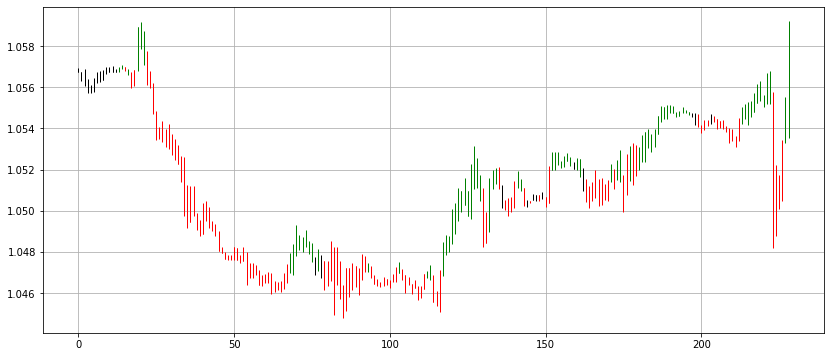

In [47]:

ohlcPlot(df)
